In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the CSV
self_sim_end_truncate_df = pd.read_csv(
    "/home/tom.rahav/GASLITE/data/defense_data/self_sim_table_end_truncate.csv"
)
query_sim_end_truncate_df = pd.read_csv(
    "/home/tom.rahav/GASLITE/data/defense_data/query_sim_table_end_truncate.csv"
)

# Extract vector type from qid_vector column
self_sim_end_truncate_df["vector"] = self_sim_end_truncate_df["qid_vector"].str.extract(
    r"_(query|attack|true_\d+)$"
)[0]
query_sim_end_truncate_df["vector"] = query_sim_end_truncate_df[
    "qid_vector"
].str.extract(r"_(query|attack|true_\d+)$")[0]

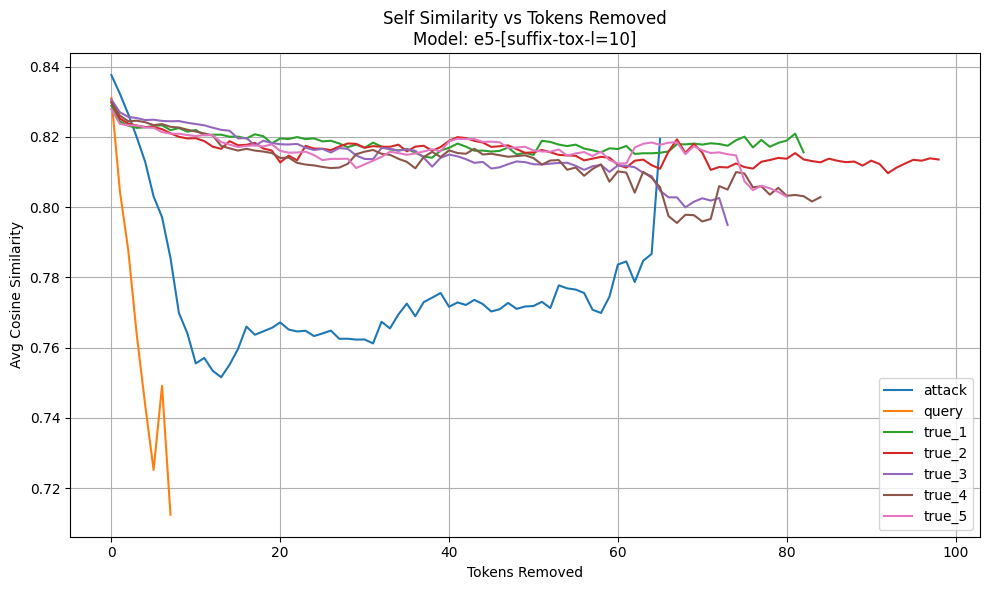

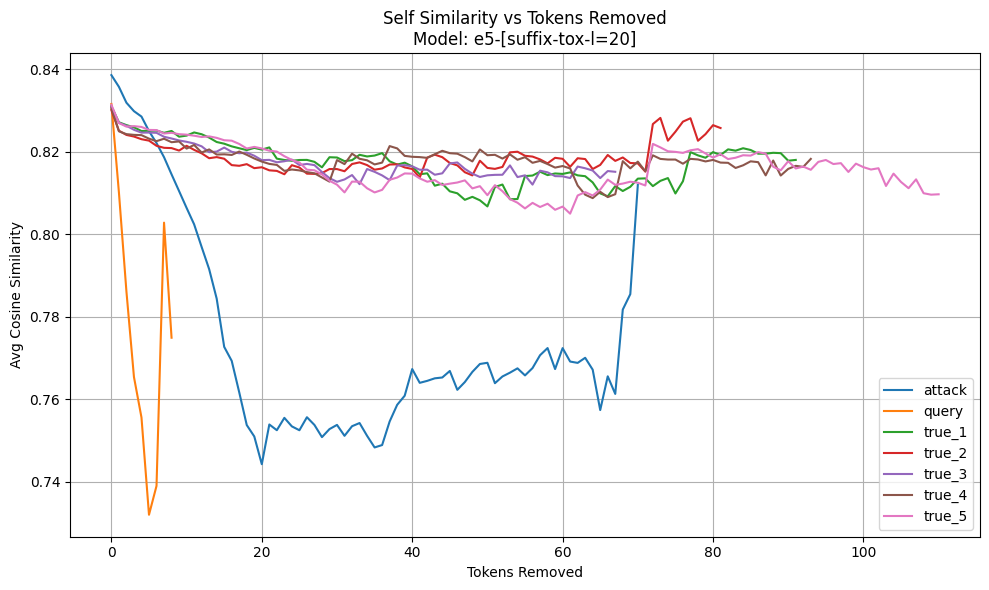

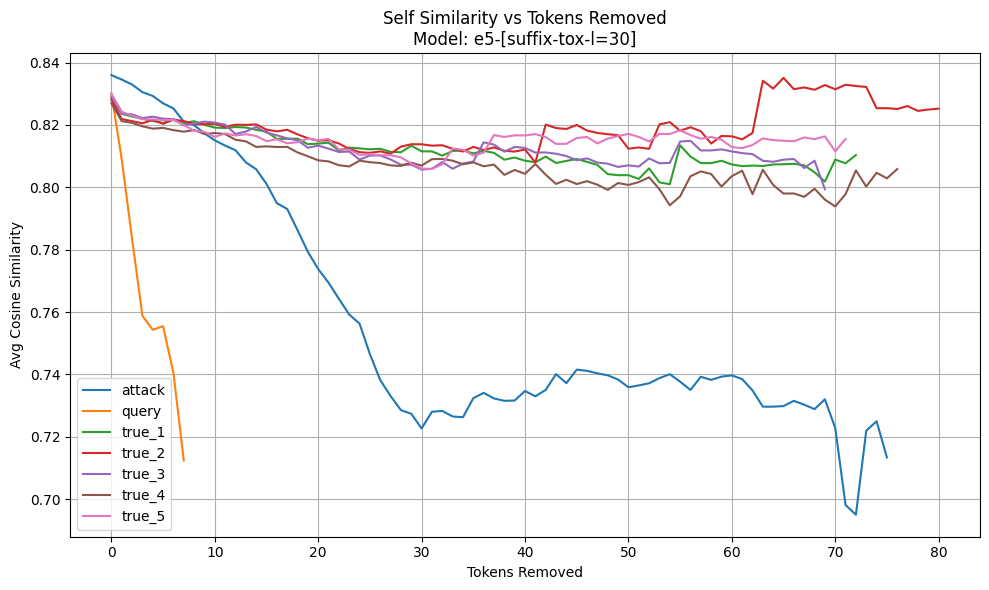

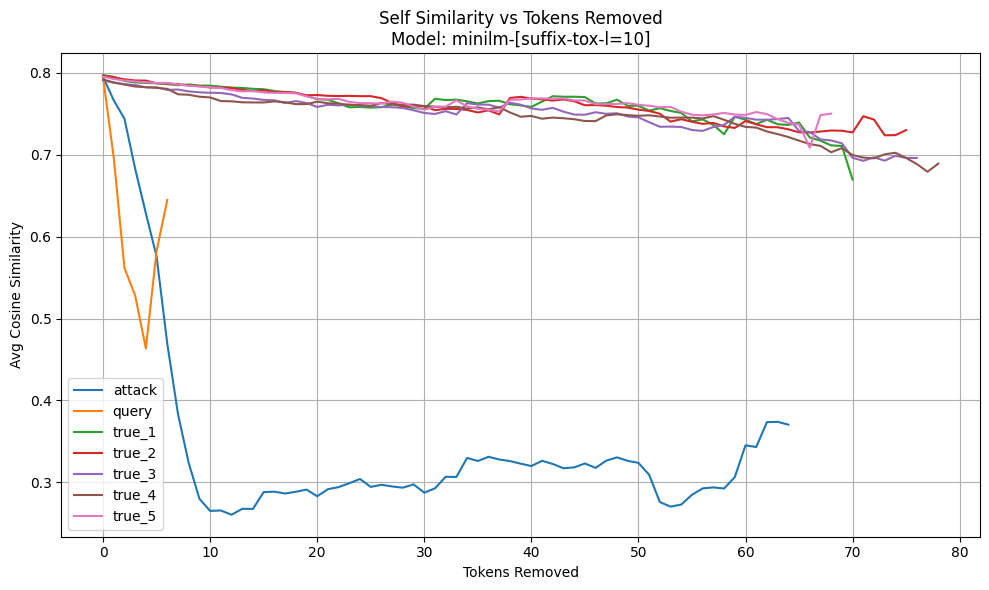

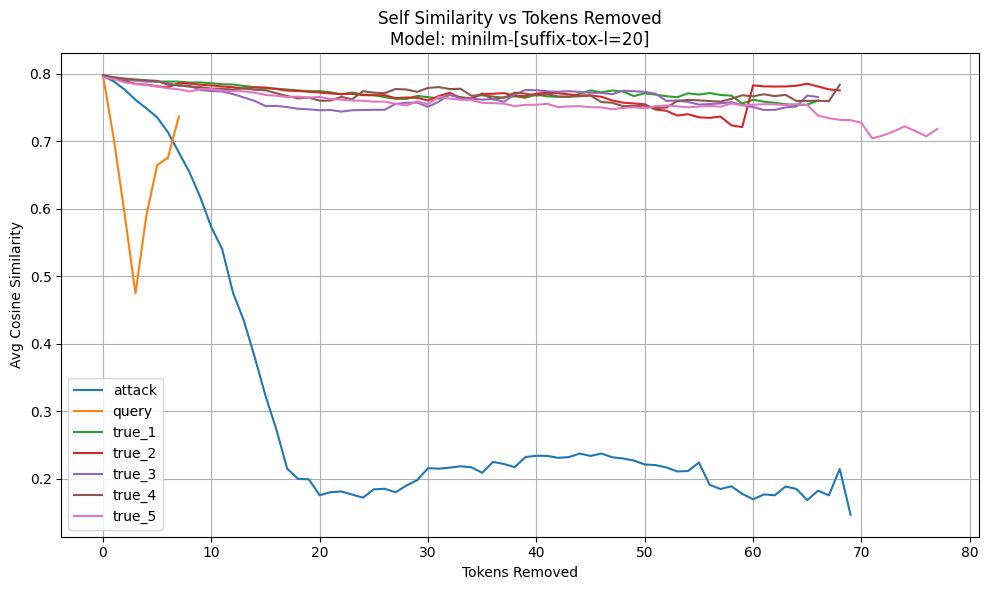

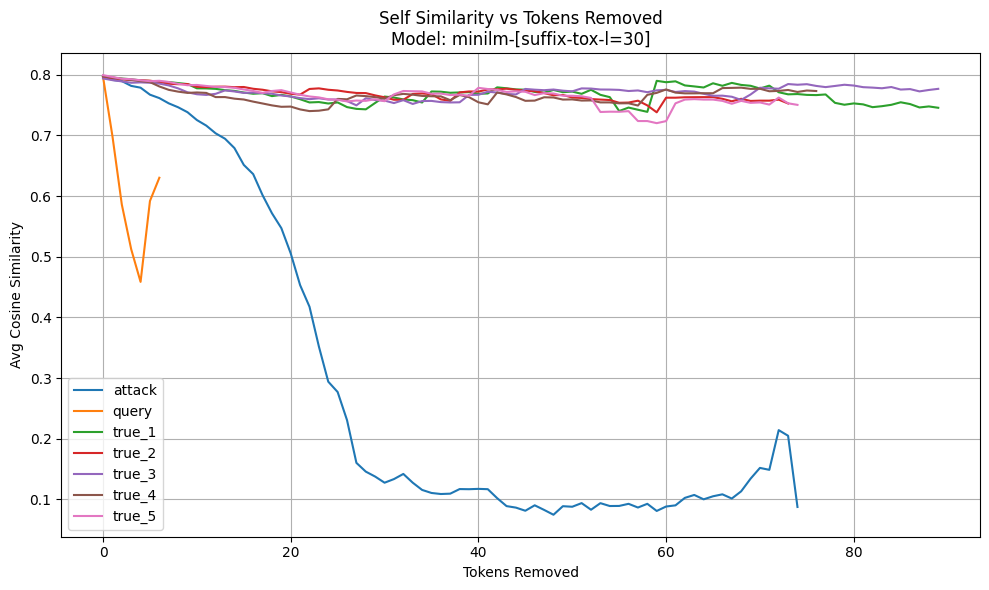

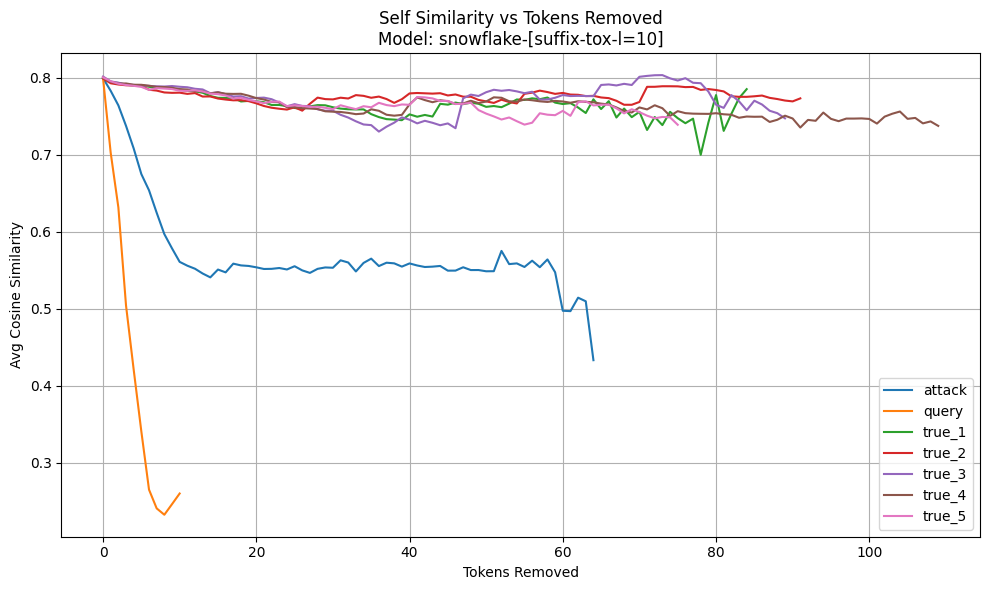

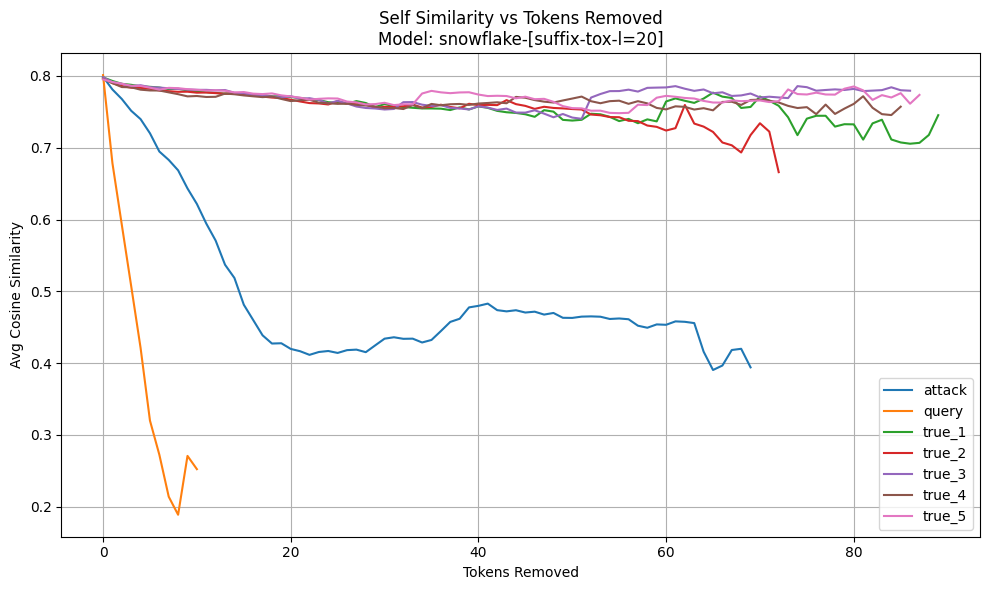

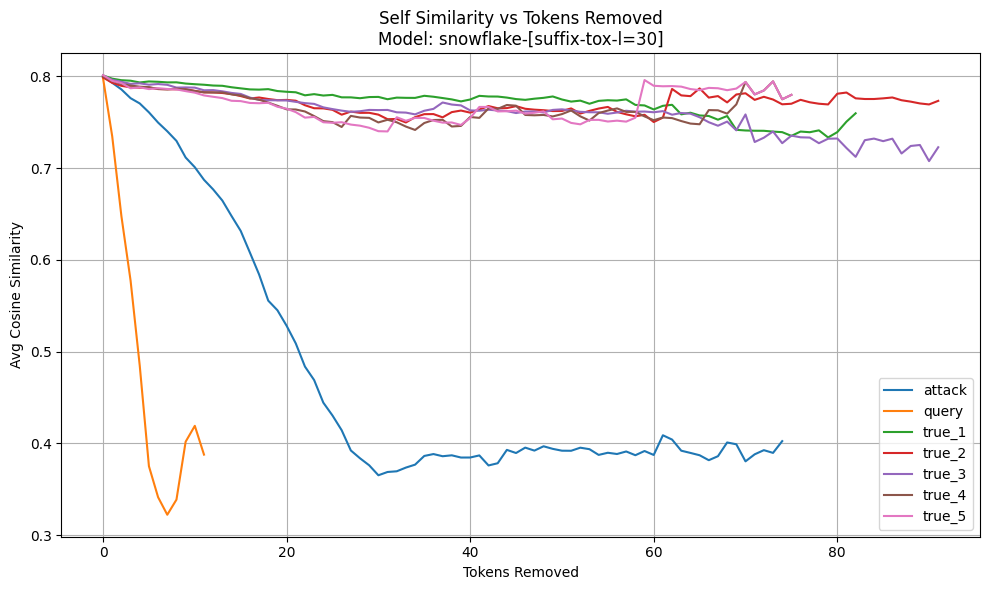

In [ ]:
# Group by model name
for model_name, model_df in self_sim_end_truncate_df.groupby("name"):
    plt.figure(figsize=(10, 6))

    # Group by (vector, tokens_removed) and average cosine similarity
    grouped = (
        model_df.groupby(["vector", "tokens_removed"])["cosine_similarity"]
        .mean()
        .reset_index()
    )

    # Plot one line per vector (query, attack, true_1 ... true_5)
    for vector_type in grouped["vector"].unique():
        sub_df = grouped[grouped["vector"] == vector_type]
        plt.plot(
            sub_df["tokens_removed"], sub_df["cosine_similarity"], label=vector_type
        )

    plt.title(f"Self Similarity vs Tokens Removed From End\nModel: {model_name}")
    plt.xlabel("Tokens Removed")
    plt.ylabel("Avg Cosine Similarity")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

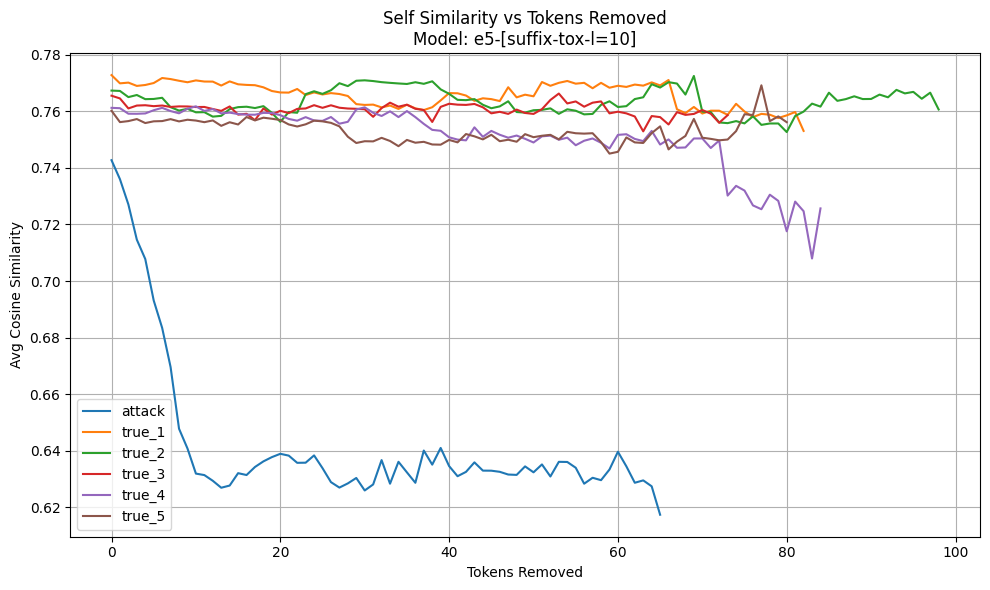

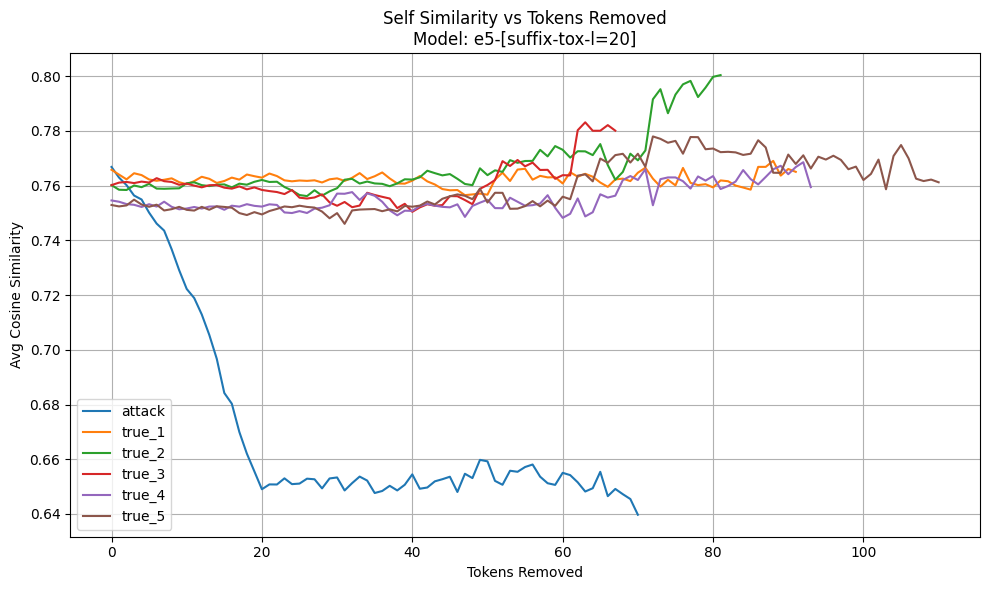

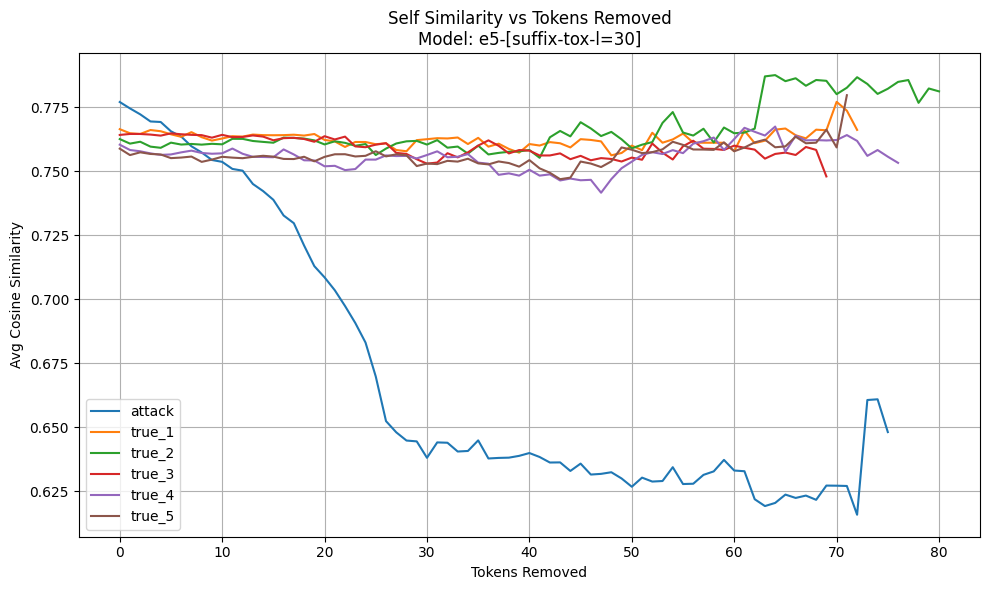

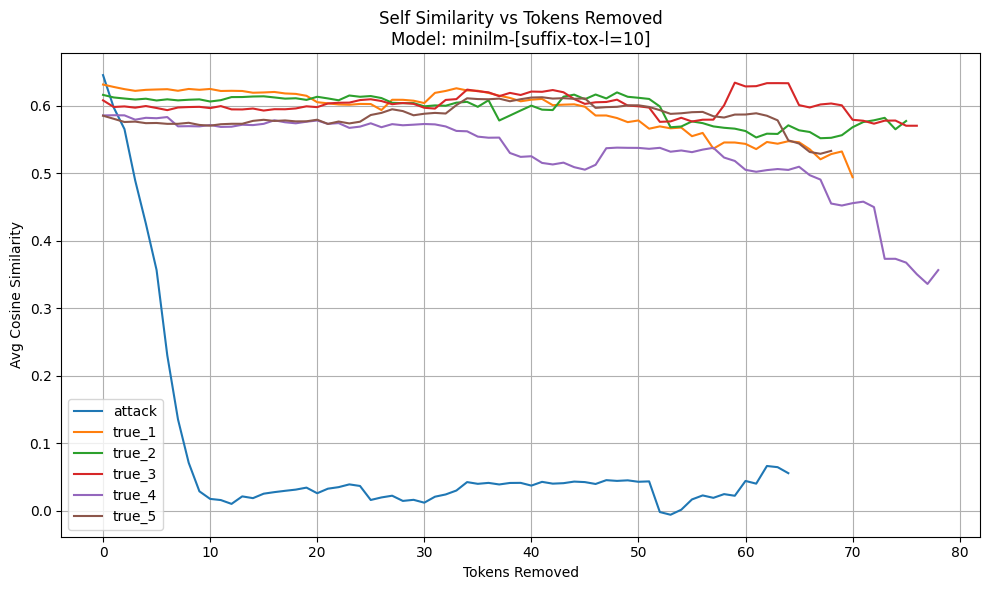

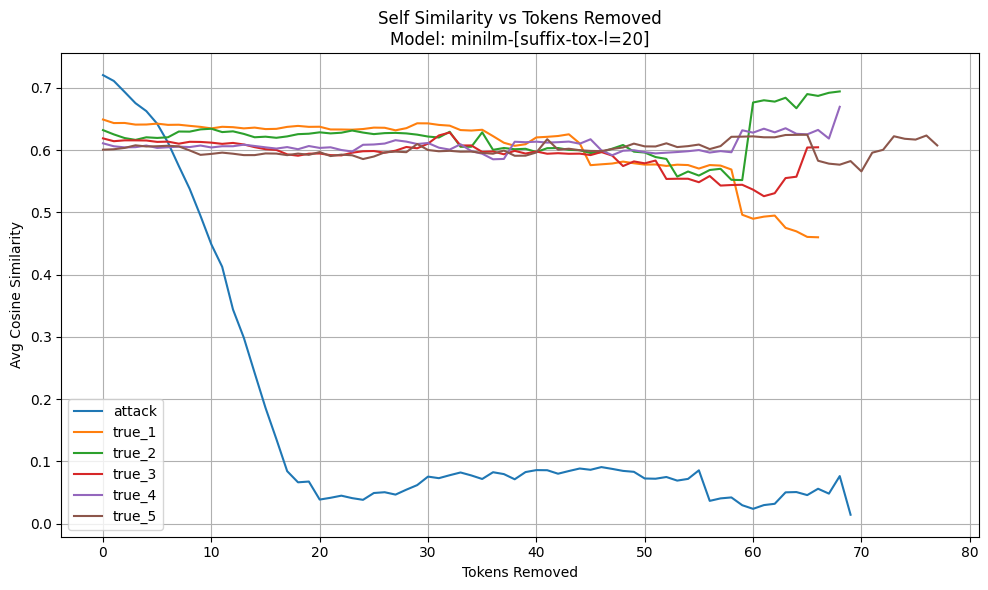

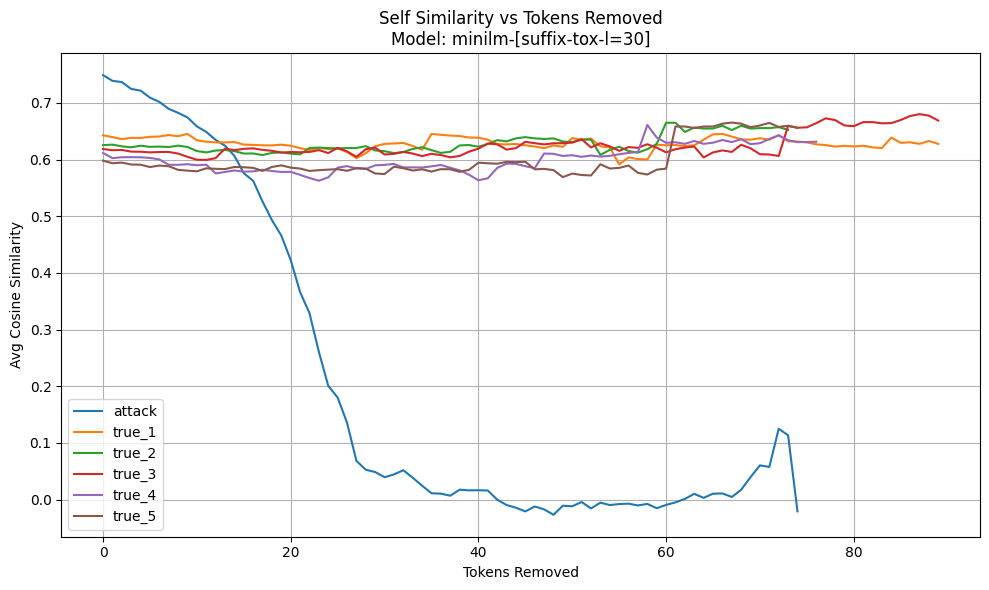

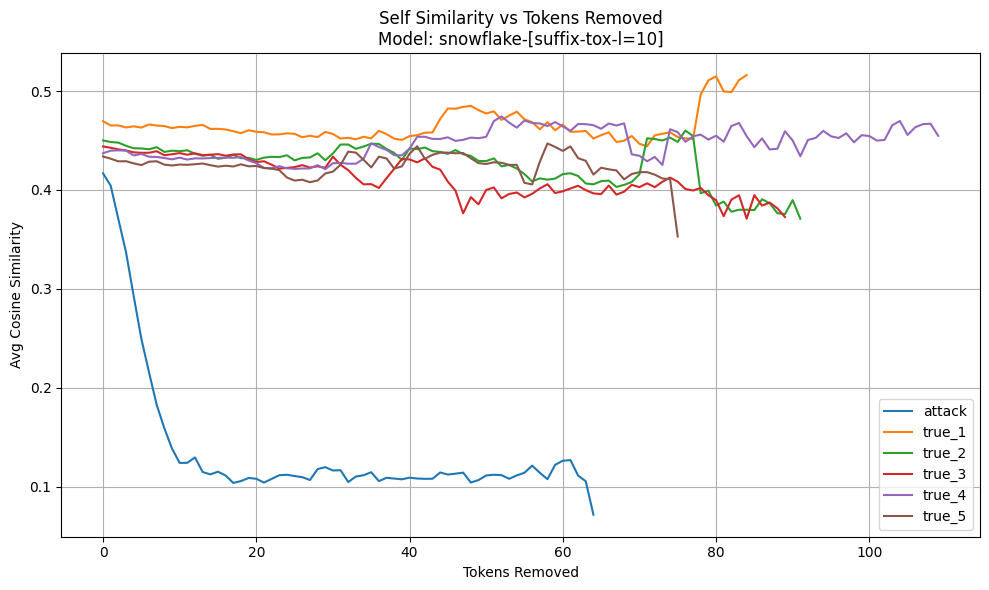

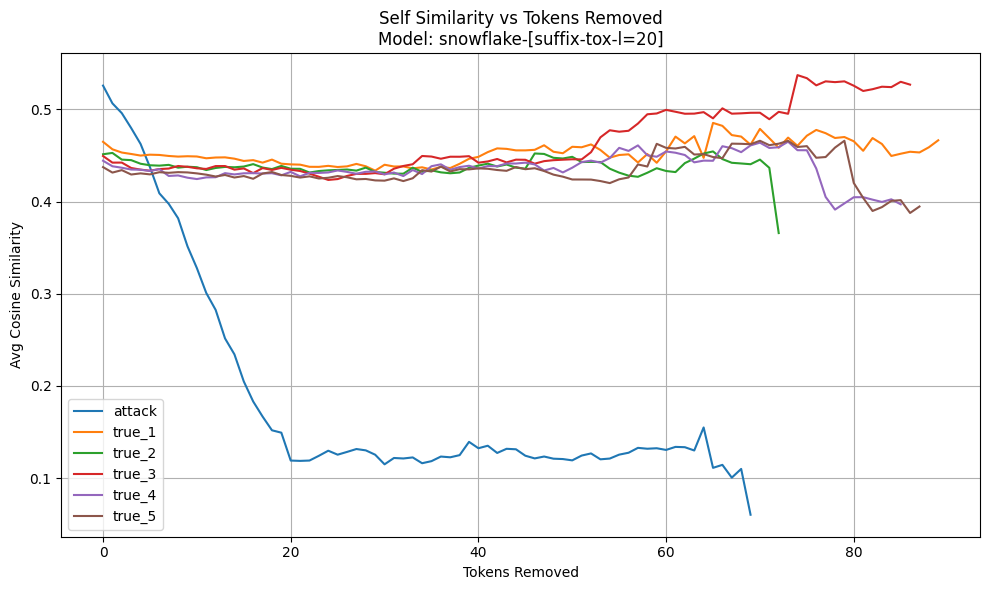

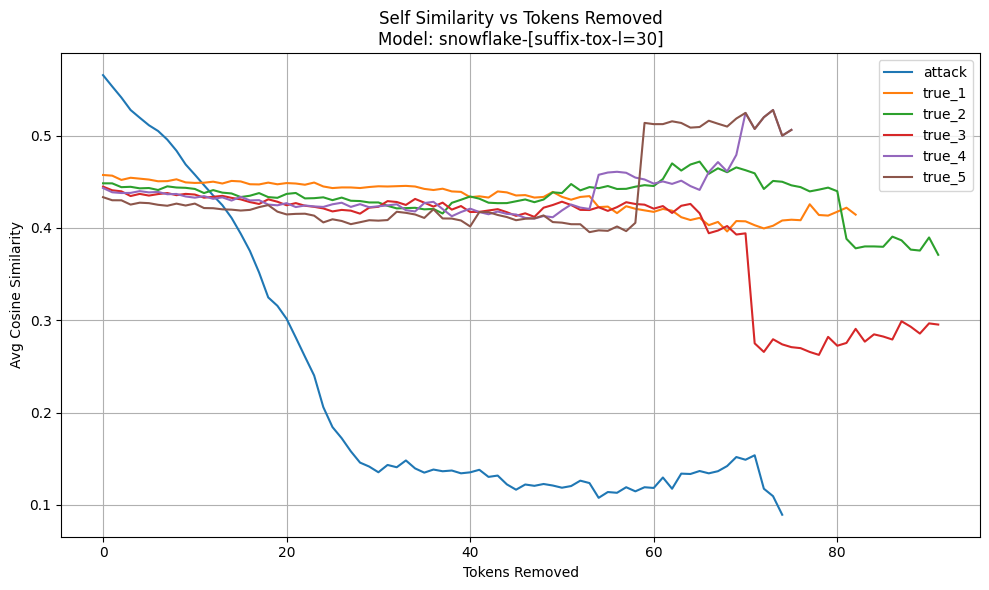

In [ ]:
# Group by model name
for model_name, model_df in query_sim_end_truncate_df.groupby("name"):
    plt.figure(figsize=(10, 6))

    # Group by (vector, tokens_removed) and average cosine similarity
    grouped = (
        model_df.groupby(["vector", "tokens_removed"])["cosine_similarity"]
        .mean()
        .reset_index()
    )

    # Plot one line per vector (query, attack, true_1 ... true_5)
    for vector_type in grouped["vector"].unique():
        sub_df = grouped[grouped["vector"] == vector_type]
        plt.plot(
            sub_df["tokens_removed"], sub_df["cosine_similarity"], label=vector_type
        )

    plt.title(f"Self Similarity vs Tokens Removed From End\nModel: {model_name}")
    plt.xlabel("Tokens Removed")
    plt.ylabel("Avg Cosine Similarity")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()